## ======================================================================

# 75.06/95.58 Organización de Datos

# Primer Cuatrimestre de 2018

# Trabajo Práctico 1: Análisis Exploratorio

## Integrantes:

Marcelo Iannuzzi

Gabriel La Torre

Andrés Silvestri

## ======================================================================

# Introducción

Este trabajo está enfocado en hacer un primer análisis de los datos ofrecidos por la empresa Navent, de manera que encontremos particularidades que puedan ser de interés para dicha entidad.

Siendo este el caso, lo primero que vamos a hacer es interiorizarnos de uno de los pilares que tiene la ciencia de datos, el negocio.

# ¿De qué se encarga Navent?

Navent es una empresa que tiene dos misiones muy bien marcadas que se traducen en dos negocios distintos: "Ayudamos a que las personas logren dos de los anhelos más importantes de la vida. Encontrar un Empleo y un Hogar."

Es decir que un negocio son los recursos humanos y el otro negocio es el negocio de bienes raíces.

Dicho esto, primero haremos un primer análisis de los datos recibidos para saber con qué información lidiamos y empezaremos a proponernos preguntas que puedan ser de utilidad para la empresa. Posteriormente intentaremos buscar respuesta a esas preguntas en base a los datos obtenidos y propondremos una visualización que ayude a su rápido ententimiento.

## ======================================================================

# Organización del Informe:

A continuación enunciaremos en primer instancia como tendremos dividido el informe que llevaremos a cabo.
Lo primero será el armado de los datos, luego haremos análisis sobre los postulantes, los avisos por separado y luego junto a la información provista de las visitas y los postulaciones un análisis que englobe todo esto. Con esta idea tratamo de abordar en primer instancia la información que tenemos por separado, ver que se puede obtener de cada parte y luego unificarla para poder trabajarla unificando criterios.

## 1 - Importación y estructura de los datos:

    1.1 - Configuración básica y obtención de los datasets.
    1.2 - Procesamiento general de las información y armado básico.
    1.3 - Resumen y cuestiones a tener en cuenta sobre el informe.
    
## 2 - Análisis sobre los postulantes registrados:

    2.1 - ¿Cuales son los rangos de edad que más comunes entre los usuarios registrados?
    2.2 - ¿Qué nivel de especialización tienen estos postulantes?
    2.3 - ¿Cual es la proporción entre los géneros de los usuarios registrados?
    2.4 - ¿Hay relevancia por parte de los usuarios que no han registrado su género?
    
## 3 - Análisis sobre los avisos publicados:

    3.1 - ¿Qué proporción tenemos entre las zonas que afectan los avisos?
    3.2 - ¿Cuales son los tipo de trabajo más requeridos, full-time, part-time?
    3.3 - ¿Qué proporción tenemos entre los avisos que están online y los offline?
    3.4 - ¿Qué proporción tenemos avisos para Juniors y para Sr/Ssr?
    
## 4 - Análisis sobre las visitas:

    4.1 - ¿Qué días de la semana se ven más avisos?
    4.2 - ¿Cuales son las areas con mayor cantidad de visitas?
    4.3 - ¿Cuales vendrían a ser las ingenierías con mayor cantidad de visitas?
    4.4 - ¿Qué porcentaje de los avisos evaluados/visitados está online?
    4.5 - ¿Cuales son las empresas que reciben mayor cantidad de visitas en sus avisos?
    4.6 - ¿Qué género es el que más utiliza los servicios de la empresa?
    
## 5 - Análisis sobre las postulaciones:

    5.1 - ¿Qué días de la semana se postula más gente?
    5.2 - ¿Cuales son las areas con mayor cantidad de postulaciones?
    5.3 - ¿Cuales vendrían a ser las ingenierías con mayor cantidad de postulaciones?
    5.4 - ¿Qué porcentaje de los avisos donde se ha postulado la gente está online?
    4.5 - ¿Cuales son las empresas con mayor cantidad de postulaciones en sus avisos?
    5.6 - ¿Quienes se postulan más a los avisos? ¿Hombres o mujeres?
    
## 6 - Conclusiones generales:

    6.1 - Conclusiones sobre lo que hemos obtenido del informe.
    6.2 - Repositorio GitHub.

## ======================================================================

# 1 - Importación y estructura de los datos:

## 1.1 - Configuración básica y obtención de los datasets.

In [9]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
#plt.rcParams['figure.figsize'] = (20, 10)

In [10]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
nivel_educativo = pd.read_csv('fiuba_1_postulantes_educacion.csv')
nacimiento_genero = pd.read_csv('fiuba_2_postulantes_genero_y_edad.csv')
vistas_avisos = pd.read_csv('fiuba_3_vistas.csv')
postulaciones = pd.read_csv('fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('fiuba_6_avisos_detalle.csv')

## ======================================================================

## 1.2 - Procesamiento general de las información y armado básico.

Para cada una de las diferentes fuentes de datos haremos diversos tratamientos, tanto para purificar los datos como para filtrar aquellos que más nos ineresan, se hará una breve explicación sobre lo que se trata de obtener en cada caso a modo de resumen, como así también se comentara cada linea de código para que se pueda interpretar qué es lo que se decidió hacer en cada caso.

### 1.2.1 - Postulantes: 

Lo primero que vamos a tratar es ver que hay registros repetidos (debido a que cada postulante tiene varios niveles educativos registrados), por otro lado haremos un cálculo de la edad que posee cada postulante y los filtraremos por aquellos que están en un rango de edad coherente (no al trabajo infantil y tampoco a las personas que sobrepasan los cien años). Sobre la edad decidimos agregar una columna que nos represente el rango al que pertenece la persona, siendo un criterio arbitrario y subjetivo pero que nos servirá para análisis posteriores. También hacemos una pequeña limpieza sobre los niveles de educación como así también un filtrado de duplicados cuando no nos interese el apartado educativo.

In [11]:
## UNIFICACIÓN BÁSICA SOBRE LA INFORMACIÓN DE LOS POSTULANTES.
postulantes = nivel_educativo.merge(nacimiento_genero,left_on='idpostulante', right_on='idpostulante',how='outer')
## TRANSFORMAMOS A DATETIME LA FECHA DE NACIMIENTO DE LOS POSTULANTES.
postulantes['fechanacimiento'] = pd.to_datetime(postulantes['fechanacimiento'], errors = 'coerce')
## CALCULAMOS LA EDAD DE LOS POSTULANTES CON UN VALOR NUMÉRICO.
now = pd.Timestamp(DT.datetime.now())
postulantes['edad'] = (now - postulantes['fechanacimiento']).astype('<m8[Y]')
## SOLO CONSIDERAMOS COMO VÁLIDOS AQUELLOS POSTULANTES DE ENTRE 17 Y 100 AÑOS.
postulantes = postulantes[(postulantes['edad'] > 17) & (postulantes['edad'] < 100)]
## ARMAMOS UNA COLUMNA SOBRE EL RANGO DE EDAD QUE TIENEN LOS POSTULANTES.
postulantes['rango_edad'] = 'abc'
postulantes.loc[postulantes.edad < 20, 'rango_edad'] = '< 20'
postulantes.loc[postulantes.edad > 65, 'rango_edad'] = '> 65'
postulantes.loc[postulantes.rango_edad == 'abc', 'rango_edad'] = '> 65'
## ARMAMOS LOS DIFERENTES RANGOS DE EDAD QUE SE PUEDEN IR DANDO ENTRE LOS POSTULANTES.
postulantes.loc[(postulantes.edad >= 20) & (postulantes.edad <= 24), 'rango_edad'] = '20 ~ 25'
postulantes.loc[(postulantes.edad >= 25) & (postulantes.edad <= 29), 'rango_edad'] = '25 ~ 30'
postulantes.loc[(postulantes.edad >= 30) & (postulantes.edad <= 34), 'rango_edad'] = '30 ~ 35'
postulantes.loc[(postulantes.edad >= 35) & (postulantes.edad <= 39), 'rango_edad'] = '35 ~ 40'
postulantes.loc[(postulantes.edad >= 40) & (postulantes.edad <= 44), 'rango_edad'] = '40 ~ 45'
postulantes.loc[(postulantes.edad >= 45) & (postulantes.edad <= 49), 'rango_edad'] = '45 ~ 50'
postulantes.loc[(postulantes.edad >= 50) & (postulantes.edad <= 54), 'rango_edad'] = '50 ~ 55'
postulantes.loc[(postulantes.edad >= 55) & (postulantes.edad <= 59), 'rango_edad'] = '55 ~ 60'
postulantes.loc[(postulantes.edad >= 60) & (postulantes.edad <= 64), 'rango_edad'] = '60 ~ 65'
## ANALIZAMOS LOS NIVELES EDUCATIVOS Y UNIFICAMOS CRITERIOS SOBRE ESTOS.
postulantes.loc[postulantes.nombre == 'Terciario/Técnico', 'nombre'] = 'Terciario'
postulantes.loc[postulantes.nombre == 'Terciario/Tecnico', 'nombre'] = 'Terciario'
## PARA LOS ANÁLISIS DONDE EL NIVEL EDUCATIVO NO ES RELEVANTE HACEMOS UNA LIMPIEZA DE DUPLICADOS.
postulantes_unicos = postulantes.drop_duplicates(subset="idpostulante", keep='first', inplace=False)

### 1.2.2 - Avisos: 

Lo primero que vamos a tratar con respecto a estos datos es que hay unos pocos que son fuera de CABA y GBA (exactamente 2) esto nos lleva a eliminarlos porque pierde sentido su análisis. Por otro lado vemos que hay varias formas de referirce al Gran Buenos Aires, lo que nos lleva a unificarlo. Haremos un merge con los avisos online teniendo así toda la información pertinente en una única fuente de datos, así también podremos diferenciar cuando un aviso está online y cuando no.

In [12]:
## LIMPIAMOS AQUELLOS AVISOS QUE NO PERTENECEN NI A CABA NI A GBA.
avisos_detalle = avisos_detalle[(avisos_detalle['nombre_zona'] != 'Buenos Aires (fuera de GBA)')]
## UNIFICAMOS CRITERIOS A LA HORA DE NOMBRAR AL GRAN BUENOS AIRES.
avisos_detalle.loc[avisos_detalle.nombre_zona == 'GBA Oeste', 'nombre_zona'] = 'Gran Buenos Aires'
## AGREGAMOS UN DATO PARA DISTINGUIR LOS AVISOS ONLINE.
avisos_online['esta_online'] = 'si'
## UNIFICAMOS LOS DETALLES DE LOS AVISOS CON LOS AVISOS ONLINE.
avisos_detalle_completo = avisos_detalle.merge(avisos_online,left_on='idaviso', right_on='idaviso',how='left')
## PONEMOS EN 'NO' TODOS AQUELLOS AVISOS QUE NO ESTAN ONLINE.
avisos_detalle_completo.loc[avisos_detalle_completo.esta_online != 'si', 'esta_online'] = 'no'

### 1.2.3 - Visitas: 

Sobre esta información lo primero que queremos hacer es transformar la fecha a un formato que podamos manejar con propiedad, en segunda instancia nos parece interesante obtener el día de la semana donde se produjo la visita. Luego debemos de ordenar los días para que a futuro sea más lógica la graficación. 

Luego le incorporamos la información de los detalles de cada aviso, como así también hacemos un filtro sobre las ingenierías que más relevancia muestran en los avisos, como así también una limpieza sobre los acentos tanto para la denominación de la empresa como para el area sobre la que hace referencia el aviso. Unificamos también los datos referidos a ADECCO, el cual se divercifica en zonas pero para nuestro análisis termina siendo lo mismo.

Por último y no menos importante es necesario empezar a obtener la información de quién es la persona que ha decidido visitar la publicación, con lo que terminamos unificando la información con los datos de los postulantes previamente adquiridos.

In [ ]:
## PLANTEMOAS LA FECHA EN QUE SE VISITAS EL AVISO COMO UNA NUEVA COLUMNA DATETIME.
vistas_avisos['fecha_vista'] = pd.to_datetime(vistas_avisos['timestamp'], errors = 'coerce')
## HACEMOS UNA DIFERENCIA ENTRE EL DÍA DE LA SEMANA EN EL QUE SE LLEVÓ A CABO LA VISITA.
vistas_avisos['dia_semana'] = vistas_avisos['fecha_vista'].dt.weekday_name
## CREAMOS UN ORDENAMIENTO PARA LOS DÍAS DE LA SEMANA, COSA DE QUE NO QUEDE ORDENADA POR VALORES ASCENDENTES.
vistas_avisos['dia_semana'] = pd.Categorical(vistas_avisos['dia_semana'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
vistas_dias = vistas_avisos['dia_semana'].value_counts()
vistas_dias = vistas_dias.sort_index()
## LE AGREGAMOS EL DETALLE DE LOS AVISOS A LAS VISITAS QUE ESTAMOS TRABAJANDO.
vistas_avisos_completas = vistas_avisos.merge(avisos_detalle_completo,left_on='idAviso', right_on='idaviso',how='left')
## HACEMOS UNA LIMPIEZA SOBRE ALGUNOS NOMBRE EN LAS VISITAS.
vistas_avisos_completas.loc[vistas_avisos_completas.nombre_area == 'Ingeniería  Eléctrica y Electrónica', 'nombre_area'] = 'Ingeniería Eléctrica y Electrónica'
vistas_avisos_completas.loc[vistas_avisos_completas.nombre_area == 'Ingeniería  Mecánica', 'nombre_area'] = 'Ingeniería Mecánica'
vistas_avisos_completas.loc[vistas_avisos_completas.nombre_area == 'Ingeniería  Industrial', 'nombre_area'] = 'Ingeniería Industrial'
vistas_avisos_completas.loc[vistas_avisos_completas.nombre_area == 'Ingeniería  Automotriz', 'nombre_area'] = 'Ingeniería Automotriz'
vistas_avisos_completas.loc[vistas_avisos_completas.nombre_area == 'Ingeniería  Metalurgica', 'nombre_area'] = 'Ingeniería Metalurgica'
## LIMPIAMOS LOS ACENTOS PARA EL NOMBRE_AREA QUE NOS TRAEN PROBLEMAS A LA HORA DE GRAFICAR.
vistas_avisos_completas['nombre_area'] = vistas_avisos_completas['nombre_area'].str.replace("á", "a")
vistas_avisos_completas['nombre_area'] = vistas_avisos_completas['nombre_area'].str.replace("é", "e")
vistas_avisos_completas['nombre_area'] = vistas_avisos_completas['nombre_area'].str.replace("í", "i")
vistas_avisos_completas['nombre_area'] = vistas_avisos_completas['nombre_area'].str.replace("ó", "o")
vistas_avisos_completas['nombre_area'] = vistas_avisos_completas['nombre_area'].str.replace("ú", "u")
## LIMPIAMOS LOS ACENTOS PARA LA DENOMINACION_EMPRESA QUE NOS TRAEN PROBLEMAS A LA HORA DE GRAFICAR.
vistas_avisos_completas['denominacion_empresa'] = vistas_avisos_completas['denominacion_empresa'].str.replace("á", "a")
vistas_avisos_completas['denominacion_empresa'] = vistas_avisos_completas['denominacion_empresa'].str.replace("é", "e")
vistas_avisos_completas['denominacion_empresa'] = vistas_avisos_completas['denominacion_empresa'].str.replace("í", "i")
vistas_avisos_completas['denominacion_empresa'] = vistas_avisos_completas['denominacion_empresa'].str.replace("ó", "o")
vistas_avisos_completas['denominacion_empresa'] = vistas_avisos_completas['denominacion_empresa'].str.replace("ú", "u")
## HACEMOS UN FILTRADO SOBRE LAS AREAS QUE SE RELACIONAN CON INGENIERÍA.
filtrado_ingenieria = vistas_avisos_completas[vistas_avisos_completas['nombre_area'].str.contains("Ingen", na=False)]
filtrado_ingenieria['nombre_area'] = filtrado_ingenieria['nombre_area'].str.replace("Ingenieria", "I.")
filtrado_ingenieria['nombre_area'] = filtrado_ingenieria['nombre_area'].str.replace("Ingenierias", "I.")
## COMO LOS NOMBRES SUELEN SER MUY LARGOS LOS LIMPIAMOS PARA QUE SEA MÁS LEGIBLE EL GRÁFICO.
filtrado_ingenieria = filtrado_ingenieria[filtrado_ingenieria['nombre_area'].str.contains("I. ", na=False)]
## NOS QUEDAMOS CON LAS DIEZ MÁS RELEVANTES.
diez_ingenierias = filtrado_ingenieria['nombre_area'].value_counts()[:10]
## PARA COMPARAR TAMBIÉN BUSCAMOS AQUELLLAS AREAS EN GENERAL QUE TIENEN MÁS VISITAS.
top_visitados_area= vistas_avisos_completas['nombre_area'].value_counts()[:10]
## VIENDO LOS DATOS VEMOS QUE ADECCO TIENE MUCHOS DATOS PERO SEPARADOS SEGÚN ZONAS, LOS UNIFICAMOS PARA MAYOR CLARIDAD.
vistas_avisos_completas.loc[vistas_avisos_completas.denominacion_empresa.str.contains("Adecco")==True, 'denominacion_empresa'] = 'Adecco'
## VEMOS LAS EMPRESAS QUE TIENEN UNA MAYOR CANTIDAD DE VISITAS.
diez_vistas_empresas = vistas_avisos_completas['denominacion_empresa'].value_counts()[:10]
## PARAMETRIZAMOS LAS FECHAS TANTO EL DÍA COMO EL MES PARA ESTE FUENTE DE DATOS COMPLETA.
vistas_avisos_completas['fecha_vista_completa'] = pd.to_datetime(vistas_avisos_completas['timestamp'], errors = 'coerce')
vistas_avisos_completas['dia_semana_completa'] = vistas_avisos_completas['fecha_vista_completa'].dt.weekday_name
vistas_avisos_completas['mes_completa'] = vistas_avisos_completas['fecha_vista_completa'].dt.month
vistas_avisos_completas['dia_completa'] = vistas_avisos_completas['fecha_vista_completa'].dt.day
## OBTENEMOS LA INFORMACION DE QUIEN HA HECHO LA VISITA.
vistas_avisos_completas = vistas_avisos_completas.merge(postulantes_unicos,left_on='idpostulante', right_on='idpostulante',how='left')

### 1.2.4 - Postulaciones: 

Con estos datos vamos a ver las postulaciones a los avisos propiamente dichos, lo primero sería hacer algo similar a lo que se hizo con las visitas, transformar la fecha a un formato apropiado para poder trabajarla, nuevamente como segunda medida obtenemos el día de la semana al que corresponde cada postulación. Luego debemos de ordenar los días de la semana para que sea más lógica la graficación, también nificamos con los detalles que tienen los avisos cosa de poder contrastar mayor información, como así también aplicamos una limpieza sobre los acentos tanto para el area como para la denominación de la empresa. 

Obtenemos también las diez areas con más postulaciones y las diez ingenierías con más postulaciones. Unificamos los datos referidos a ADECCO, el cual se divercifica en zonas pero para nuestro análisis termina siendo lo mismo. Luego esto nos lleva a tomar un listado de las diez empresas con mayor cantidad de postulaciones.

Por último y no menos importante es necesario empezar a obtener la información de quién es la persona que se ha decidido postular, con lo que terminamos unificando la información con los datos de los postulantes previamente adquiridos.

In [20]:
## REDUCIMOS EL STRING QUE CORRESPONDE A LA FECHA SOLO HACIENDO REFERENCIA AL DÍA/MES/AÑO.
postulaciones['fecha_postulado'] = postulaciones['fechapostulacion'].str.slice(0, 10)
## LO TRANSFORMAMOS EN UN DATETIME COSA DE PODER TRABAJARLO MEJOR.
postulaciones['fecha_postulado'] = pd.to_datetime(postulaciones['fecha_postulado'], errors = 'coerce')
## OBTENEMOS EL DÍA DE LA SEMANA QUE CORRESPONDE A ESA POSTULACIÓN EN CUESTIÓN.
postulaciones['dia_semana'] = postulaciones['fecha_postulado'].dt.weekday_name
## CREAMOS UN ORDENAMIENTO PARA LOS DÍAS DE LA SEMANA, COSA DE QUE NO QUEDE ORDENADA POR VALORES ASCENDENTES.
postulaciones['dia_semana'] = pd.Categorical(postulaciones['dia_semana'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
postulaciones_dias = postulaciones['dia_semana'].value_counts()
postulaciones_dias = postulaciones_dias.sort_index()
## LE AGREGAMOS EL DETALLE DE LOS AVISOS A LAS POSTULACIONES QUE ESTAMOS TRABAJANDO.
postulaciones_avisos_completos = postulaciones.merge(avisos_detalle_completo,left_on='idaviso', right_on='idaviso',how='left')
## LIMPIAMOS LOS ACENTOS SOBRE EL NOMBRE_AREA QUE NOS TRAEN PROBLEMAS A LA HORA DE GRAFICAR.
postulaciones_avisos_completos['nombre_area'] = postulaciones_avisos_completos['nombre_area'].str.replace("á", "a")
postulaciones_avisos_completos['nombre_area'] = postulaciones_avisos_completos['nombre_area'].str.replace("é", "e")
postulaciones_avisos_completos['nombre_area'] = postulaciones_avisos_completos['nombre_area'].str.replace("í", "i")
postulaciones_avisos_completos['nombre_area'] = postulaciones_avisos_completos['nombre_area'].str.replace("ó", "o")
postulaciones_avisos_completos['nombre_area'] = postulaciones_avisos_completos['nombre_area'].str.replace("ú", "u")
## LIMPIAMOS LOS ACENTOS SOBRE LA DENOMINACIÓN_EMPRESA QUE NOS TRAEN PROBLEMAS A LA HORA DE GRAFICAR.
postulaciones_avisos_completos['denominacion_empresa'] = postulaciones_avisos_completos['denominacion_empresa'].str.replace("á", "a")
postulaciones_avisos_completos['denominacion_empresa'] = postulaciones_avisos_completos['denominacion_empresa'].str.replace("é", "e")
postulaciones_avisos_completos['denominacion_empresa'] = postulaciones_avisos_completos['denominacion_empresa'].str.replace("í", "i")
postulaciones_avisos_completos['denominacion_empresa'] = postulaciones_avisos_completos['denominacion_empresa'].str.replace("ó", "o")
postulaciones_avisos_completos['denominacion_empresa'] = postulaciones_avisos_completos['denominacion_empresa'].str.replace("ú", "u")
## OBTENEMOS LAS DIEZ AREAS CON MÁS POSTULACIONES.
top_postulaciones_area= postulaciones_avisos_completos['nombre_area'].value_counts()[:10]
## LIMPIAMOS LOS NOMBRES DE LAS INGENIERÍAS QUE INTERVIENEN EN LA CUESTIÓN.
postulaciones_avisos_completos.loc[postulaciones_avisos_completos.nombre_area == 'Ingeniería  Eléctrica y Electrónica', 'nombre_area'] = 'Ingeniería Eléctrica y Electrónica'
postulaciones_avisos_completos.loc[postulaciones_avisos_completos.nombre_area == 'Ingeniería  Mecánica', 'nombre_area'] = 'Ingeniería Mecánica'
postulaciones_avisos_completos.loc[postulaciones_avisos_completos.nombre_area == 'Ingeniería  Industrial', 'nombre_area'] = 'Ingeniería Industrial'
postulaciones_avisos_completos.loc[postulaciones_avisos_completos.nombre_area == 'Ingeniería  Automotriz', 'nombre_area'] = 'Ingeniería Automotriz'
postulaciones_avisos_completos.loc[postulaciones_avisos_completos.nombre_area == 'Ingeniería  Metalurgica', 'nombre_area'] = 'Ingeniería Metalurgica'
## HACEMOS UN FILTRADO SOBRE EL NOMBRE DE AREA SEGÚN CORRESPONDA A INGENIERÍA.
filtrado_postu_ingenieria = postulaciones_avisos_completos[postulaciones_avisos_completos['nombre_area'].str.contains("Ingen", na=False)]
filtrado_postu_ingenieria['nombre_area'] = filtrado_postu_ingenieria['nombre_area'].str.replace("Ingenieria", "I.")
filtrado_postu_ingenieria['nombre_area'] = filtrado_postu_ingenieria['nombre_area'].str.replace("Ingenierias", "I.")
filtrado_postu_ingenieria = filtrado_postu_ingenieria[filtrado_postu_ingenieria['nombre_area'].str.contains("I. ", na=False)]
## TOMAMOS SOLO LAS DIEZ INGENIERÍAS QUE MAS RELEVANCIA MUESTREN.
diez_ingenierias_postu = filtrado_postu_ingenieria['nombre_area'].value_counts()[:10]
## VIENDO LOS DATOS VEMOS QUE ADECCO TIENE MUCHOS DATOS PERO SEPARADOS SEGÚN ZONAS, LOS UNIFICAMOS PARA MAYOR CLARIDAD.
postulaciones_avisos_completos.loc[postulaciones_avisos_completos.denominacion_empresa.str.contains("Adecco")==True, 'denominacion_empresa'] = 'Adecco'
## TOMAMOS LAS DIEZ EMPRESAS CON MAYOR CANTIDAD DE POSTULACIONES.
diez_postulaciones_empresas = postulaciones_avisos_completos['denominacion_empresa'].value_counts()[:10]
## OBTENEMOS LA INFORMACIÓN DE QUIEN HA HECHO LA POSTULACIÓN.
postulaciones_avisos_completos = postulaciones_avisos_completos.merge(postulantes_unicos,left_on='idpostulante', right_on='idpostulante',how='left')

## ======================================================================

## 1.3 - Resumen y cuestiones a tener en cuenta sobre el informe.

En primer instancia contamos con la siguiente información para poder trabajar, por un lado tenemos los postulantes que son las personas que se registran, sobre las cuales tenemos tanto su nivel educativo, su fecha de nacimiento como así también su género, sobre estos datos los hemos limpiado y armado rangos de edades como así también hemos mantenido los duplicados en los niveles educativos puesto que para algunos informes nos pueden ser de utilidad, para aquellos informes que por el contrario nos resulte redundante o genere algún tipo de ruido hemos optado por filtrarlos y que solo quede un registro por postulante.

Sobre los avisos vemos que tenemos tanto la información de si este se encuentra online como no, lo que nos da la pauta para saber si está en vigencia, por otro lado tenemos mucha información sobre el area de trabajo, el nivel de experiencia que requiere el puesto, también tenemos el nombre de la empresa (o grupo de empresas). todo sobre lo cual se pueden aplicar diversa cantidad de filtros o artilugios para limpiar los datos y poder generar gráficos más legibles y útiles.

Tenemos datos tanto de las visitas como de las postulaciones en sí, ambos se pueden trabajar de manera similar puesto que el análisis que hacemos sobre uno puede hacerse de manera análoga sobre el otro, lo que nos lleva a tomar medidas similares a la hora de normalizar datos como ser la fecha de ocurrencia, como así también la información que obtenemos del detalle referente al aviso que se esta postulando o viendo. 

## ======================================================================

# 2 - Análisis sobre los postulantes registrados:

En esta sección nos abocaremos a realizar diferentes tipos de gráficos relacionados pura y exclusivamente con los datos que tenemos sobre los postulantes, es decir que tomaremos la información provista por la fuente de datos referida a los postulantes y llevaremos a cabo diferentes análisis que nos pueden resultar de interés como de utilidad para una análisis próximo un poco más exaustivo. También es bueno considerar que muchas veces denominamos usuarios registrados a los postulantes, puesto que en definitiva representan lo mismo.

## 2.1 - ¿Cuales son los rangos de edad que más comunes entre los usuarios registrados?

Vale aclarar en este punto que hemos tomado ciertas consideraciones a tener en cuenta, en primer instancia hemos decidido que las edades que consideramos lógicas son aquellas que están dentro de un rango mayor a los 17 años y menor a los 100 años, considerando que las edades fuera de ese rango son ilógicas y no aportan nada al informe, por otro lado tenemos el problema de que a priori hay registros repetidos para los postulantes por los diferentes niveles educativos, por eso eliminamos los repetidos, total nos basta con un registro por postulante.

Text(0,0.5,'Rangos de Edad')

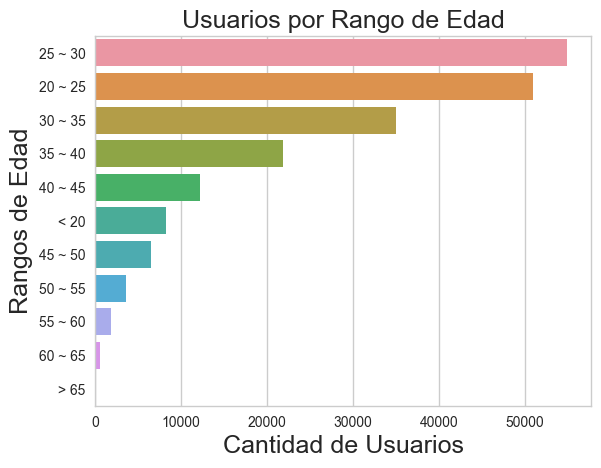

In [21]:
## MOSTRAMOS LOS RANGOS DE EDAD SIN TENER POSTULANTES REPETIDOS.
rangos_edad = postulantes_unicos['rango_edad'].value_counts()
g = sns.barplot(x=rangos_edad.values, y=rangos_edad.index, orient='h')
g.set_title("Usuarios por Rango de Edad", fontsize=18)
g.set_xlabel("Cantidad de Usuarios", fontsize=18)
g.set_ylabel("Rangos de Edad", fontsize=18)

## 2.2 - ¿Qué nivel de especialización tienen estos postulantes?

En este caso lo que nos interesa ver es el tipo de especialización que registran los diferentes usuarios, vale tener en cuenta que a diferencia del caso anterior en este caso si nos interesan los registros repetidos porque una persona puede tener varios tipos de especialización, como así también diferentes niveles educativos y el hecho de tener alguna especialización no quita la posibilidad o validez de tener otra. Por una cuestión de calidad gráfica hemos decidido unificar los terciarios y los técnicos (compartían un nombre conjunto) en solo terciarios para que fuese más legible el gráfico.

Text(0,0.5,'Cantidad de Usuarios')

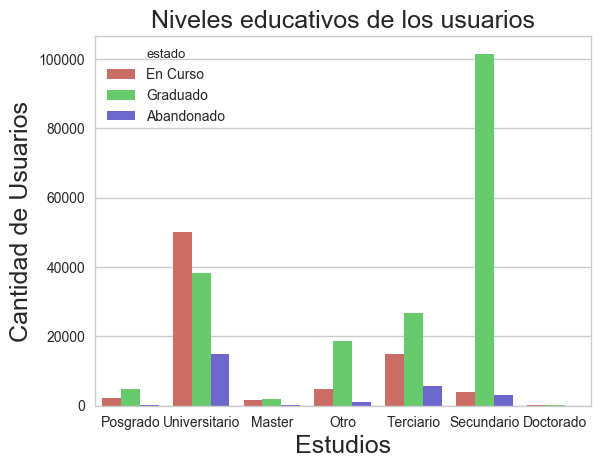

In [22]:
## GRAFICAMOS LOS DIFERENTES NIVELES EDUCATIVOS DE LOS USUARIOS.
g = sns.countplot(x="nombre", hue="estado", data=postulantes, palette="hls")
g.set_title("Niveles educativos de los usuarios", fontsize=18)
g.set_xlabel("Estudios", fontsize=18)
g.set_ylabel("Cantidad de Usuarios", fontsize=18)

## 2.3 - ¿Cual es la proporción entre los géneros de los usuarios registrados?

Lo que buscamos ver en este gráfico es la proporción que tenemos entre los diferentes postulantes, como así también ver el margen que  tenemos de usuarios que no han especificado su género, esto nos permite a futuro ver por ejemplo que trabajos son más vistos o postulados por los hombres o por las mujeres, como así también ver si se mantiene un orden parejo en su proporcionalidad. Por otro lado podemos ver si es relevante la cantidad de usuarios que no han especificado su género, lo que nos podría cambiar el enfoque si fuese un valor proporcionalmente alto.

In [1]:
## GRAFICAMOS LA PROPORCIÓN DE GÉNERO ENTRE LOS POSTULANTES.
postulantes_masculinos = postulantes_unicos[postulantes_unicos['sexo'] == 'MASC']
postulantes_femeninos = postulantes_unicos[postulantes_unicos['sexo'] == 'FEM']
postulantes_indefinidos = postulantes_unicos[postulantes_unicos['sexo'] == 'NO_DECLARA']
sizes = [postulantes_masculinos.sexo.count(), postulantes_femeninos.sexo.count(), postulantes_indefinidos.sexo.count()]
nombres = ['Masculino', 'Femenino', 'No Especifica']
plt.figure(figsize=(8, 8))
plt.title('Distribucion sobre el sexo de los postulantes', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'lightblue', 'lightred'], explode=(0.1, 0))
plt.show()

## 2.4 - ¿Hay relevancia por parte de los usuarios que no han registrado su género?

Buscamos corroborar la relevancia que puedan tener los usuarios que no han registrado su género, como así también ver si se encuentra algún factor clave en relación a esto, siempre y cuando su valor sea verdaderamente apreciable para dedicarle un análisis con mayor profundidad.

In [2]:
## GRAFICAMOS LOS USUARIOS SIN GÉNERO.

## ======================================================================

# 3 - Análisis sobre los avisos publicados:

## 3.1 - ¿Qué proporción tenemos entre las zonas que afectan los avisos?

En un primer apartado buscaremos ver que relación hay entre las zonas afectadas, a pesar de no disponer de mayor detalle, al menos podemos ver que cuantos avisos están orientados al Gran Buenos Aires y cuales a la Ciudad Autónoma de Buenos Aires, lo que nos servirá como un primer acercamiento a la información.

In [3]:
## GRAFICAMOS LA PROPORCIÓN ENTRE LAS ZONAS.
avisos_caba = avisos_detalle_completo[avisos_detalle_completo['nombre_zona'] == 'Capital Federal']
avisos_bsas = avisos_detalle_completo[avisos_detalle_completo['nombre_zona'] == 'Gran Buenos Aires']
sizes = [avisos_caba.nombre_zona.count(), avisos_bsas.nombre_zona.count()]
nombres = ['CABA', 'GBA']
plt.figure(figsize=(8, 8))
plt.title('Distribucion por las zonas referente a los avisos', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'lightblue'], explode=(0.1, 0))
plt.show()

## 3.2 - ¿Cuales son los tipo de trabajo más requeridos, full-time, part-time?

Listaremos los tipos de trabajo más buscados por las empresas y sus avisos, en primer instancia por lógica sabemos que hay dos que son los que más avisos tienen que son aquellos del tipo full-time y los del tipo part-time, pero también hay otros tipos y sería interesante ver que relación hay con el resto, son relevantes o no.

In [8]:
## GRAFICAMOS LAS ÁREAS CON MAYOR RELEVANCIA A LA HORA DE VISITAR LOS AVISOS.
avisos_tipo = avisos_detalle_completo['tipo_de_trabajo'].value_counts()[:5]
g = sns.barplot(x= avisos_tipo.values, y=avisos_tipo.index)
g.set_title("TOP 5 tipos de trabajo relevantes.", fontsize=18)
g.set_xlabel("Cantidad de aviisos", fontsize=18)
g.set_ylabel("Tipo de trabajo", fontsize=18)

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,esta_online
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,no
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,no
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL,no
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A,si
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL,no


## 3.3 - ¿Qué proporción tenemos entre los avisos que están online y los offline?

Buscamos una relación/proporción entre los diferentes avisos, ya que a priori sabemos que hay dos estados posible, tanto el online como el offline, esto nos podría indicar que sea un valor parejo entre ambos o que alguna de estas cantidades sea mucho mayor que la otra lo que nos llevaría a tomar uno u otro enfoque a la hora de proseguir con el análisis.

In [6]:
## GRAFICAMOS LA PROPORCIÓN ENTRE EL ONLINE Y EL OFFLINE.
avisos_online = avisos_detalle_completo[avisos_detalle_completo['esta_online'] == 'si']
avisos_offline = avisos_detalle_completo[avisos_detalle_completo['esta_online'] != 'si']
sizes = [avisos_online.esta_online.count(), avisos_offline.esta_online.count()]
nombres = ['Online', 'Offline']
plt.figure(figsize=(8, 8))
plt.title('Distribucion sobre los avisos online/offline', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'lightblue'], explode=(0.1, 0))
plt.show()

## 3.4 - ¿Qué proporción tenemos avisos para Juniors y para Sr/Ssr?

La idea es ver que relación hay entre los juniors y los senior o semi-senior como para corroborar si se está buscando mucha más gente con mayor experiencia y capacitación o si se busca gente con menos experiencia y/o menor capacitación, esto lo podemos vincular o relacionar con lo que hemos estudiado para los usuarios registrados y sus rangos de edad y sus niveles educativos.

In [7]:
## GRAFICAMOS LA PROPORCIÓN ENTRE JR y SSR/SR
g = sns.countplot(x='nivel_laboral', data=avisos_detalle_completo, order=avisos_detalle_completo['nivel_laboral'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("NIvel laboral", fontsize=18)
g.set_ylabel("Cantidad de avisos", fontsize=18)
g.set_title("Nivel laboral requerido en los avisos", fontsize=18)

## ======================================================================

# 4 - Análisis sobre las visitas:

## 4.1 - ¿Qué días de la semana se ven más avisos?

La idea es tener ordenada la semana y ver cómo es que hay días más influyentes a la hora de visitar anuncios, esto es independiente a los postulaciones o incluso a los avisos, porque nos da la pauta de que días la gente ingresa  a revisar con mayor frecuencia los diferentes avisos, sería interesante para las empresas el saber que día en la semana es el más propicio para iniciar una búsqueda laboral.

Text(0.5,1,'Vistas por dia de la semana')

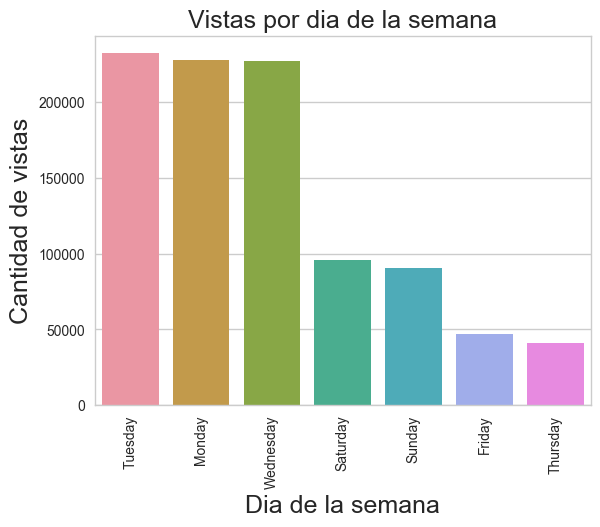

In [23]:
## GRAFICAMOS LOS DÍAS DE LA SEMANA DONDE SE VISITAN MÁS AVISOS.
g = sns.countplot(x='dia_semana', data=vistas_avisos, order=vistas_avisos['dia_semana'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dia de la semana", fontsize=18)
g.set_ylabel("Cantidad de vistas", fontsize=18)
g.set_title("Vistas por dia de la semana", fontsize=18)

## 4.2 - ¿Cuales son las areas con mayor cantidad de visitas?

Buscamos ver cuales son las areas que mayor interés traen para los usuarios, aunque esto está vinculado directamente a la cantidad de avisos que haya para cada área, pero de todas maneras nos puede ser de utilidad para corroborar cuales son estas áreas y que relación tienen con los avisos y con las postulaciones realizadas. Como bien podremos ver las areas de Ventas y Administración son las que mayor relevancia tienen y las que más visitas reciben, siendo las que predominan en el mercado.

Text(0,0.5,'Area')

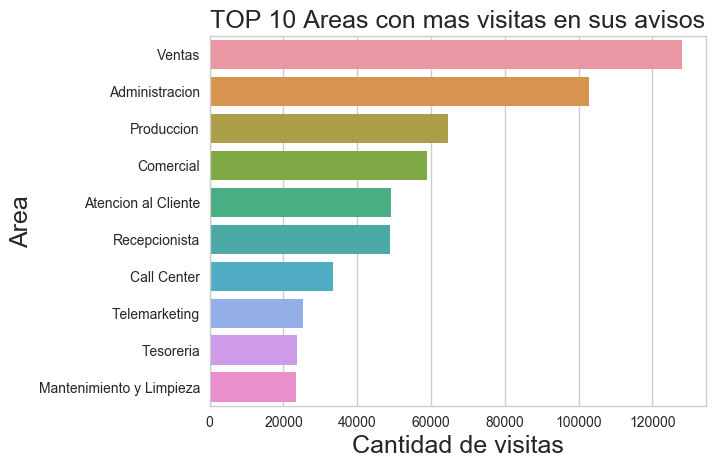

In [24]:
## GRAFICAMOS LAS ÁREAS CON MAYOR RELEVANCIA A LA HORA DE VISITAR LOS AVISOS.
g = sns.barplot(x= top_visitados_area.values, y=top_visitados_area.index)
g.set_title("TOP 10 Areas con mas visitas en sus avisos", fontsize=18)
g.set_xlabel("Cantidad de visitas", fontsize=18)
g.set_ylabel("Area", fontsize=18)

## 4.3 - ¿Cuales vendrían a ser las ingenierías con mayor cantidad de visitas?

Podemos tratar de hacer un paralelismo sobre las áreas en Ingeniería, reduciendo el ámbito de estudio solo a las que se relacionan con ingenieria o ramas afines, esto nos lleva a una conclusión bastante particular y es que la Ingeniería Industrial es la que más relevancia parece tener a la hora de visitar los avisos.

Text(0,0.5,'Ingenieria en cuestion')

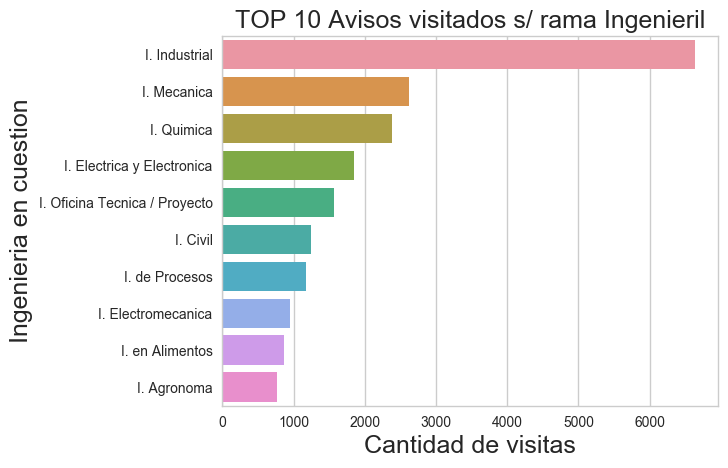

In [25]:
## GRAFICAMOS LAS DIEZ INGENIERÍAS CON MAYOR RELEVANCIA A LA HORA DE VISITAR LOS AVISOS.
g = sns.barplot(x= diez_ingenierias.values, y=diez_ingenierias.index)
g.set_title("TOP 10 Avisos visitados s/ rama Ingenieril", fontsize=18)
g.set_xlabel("Cantidad de visitas", fontsize=18)
g.set_ylabel("Ingenieria en cuestion", fontsize=18)

## 4.4 - ¿Qué porcentaje de los avisos evaluados/visitados está online?

Lo que nos sirve ver en esta gráfica es ver que porcentaje de los avisos que se visitan estan online, entendemos que el estado online de un aviso hace referencia a si está activo a la hora en que las personas se han decidido postular.

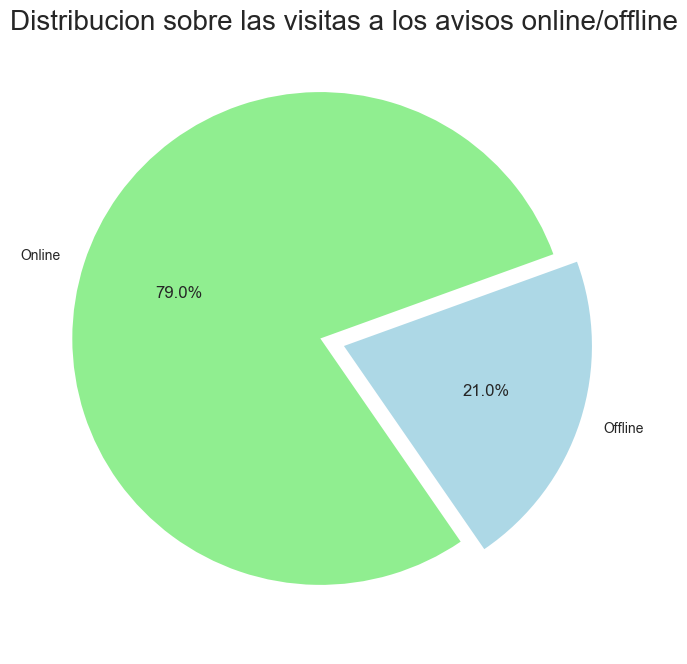

In [31]:
## GRAFICAMOS LA PROPORCIÓN ENTRE AVISOS VISITADOS ONLINE Y OFFLINE.
vistas_online = vistas_avisos_completas[vistas_avisos_completas['esta_online'] == 'si']
vistas_offline = vistas_avisos_completas[vistas_avisos_completas['esta_online'] != 'si']
sizes = [vistas_online.esta_online.count(), vistas_offline.esta_online.count()]
nombres = ['Online', 'Offline']
plt.figure(figsize=(8, 8))
plt.title('Distribucion sobre las visitas a los avisos online/offline', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'lightblue'], explode=(0.1, 0))
plt.show()

## 4.5 - ¿Cuales son las empresas que reciben mayor cantidad de visitas en sus avisos?

Sobre este punto hay que tener en cuenta que esto vinculará las empresas que tengan mayor cantidad de visitas pero también se relaciona con aquellas que tienen mayor cantidad de avisos, lo que llevará a tener por lógica una cantidad mayor de visitas, por otro lado se trató de unificar algunas empresas que se dividian en zonas pero que en definitiva eran la misma empresa. Se ha decidido tomar las diez primeras como muestra de relevancia.

Text(0,0.5,'Nombre de empresa')

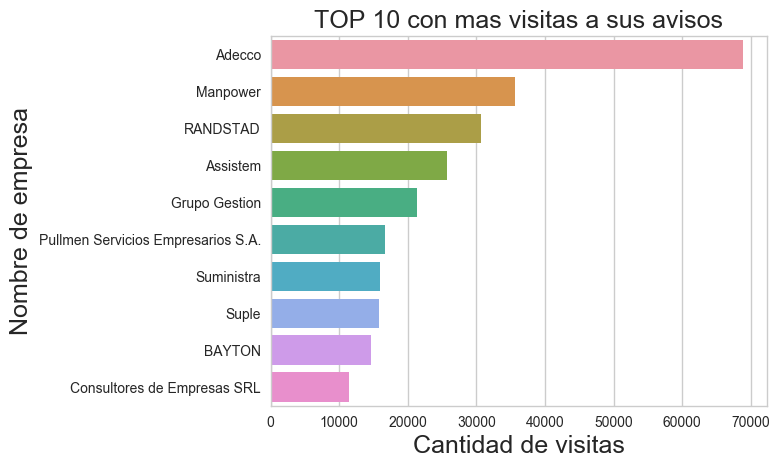

In [29]:
## CONTAMOS LAS DIEZ EMPRESAS CON MAYOR CANTIDAD DE VISITAS EN SUS AVISOS.
g = sns.barplot(x=diez_vistas_empresas.values, y=diez_vistas_empresas.index)
g.set_title("TOP 10 con mas visitas a sus avisos", fontsize=18)
g.set_xlabel("Cantidad de visitas", fontsize=18)
g.set_ylabel("Nombre de empresa", fontsize=18)

## 4.6 - ¿Qué género es el que más utiliza los servicios de la empresa?

Buscamos ver que relación hay entre el género a la hora de visitar los avisos, y ver si estos en definitiva están online u offline, pudiendo así ver cúal es el comportamiento que se va desarrollando a entre las personas, habiendo casos donde quizás una persona a revizado mas de 300 avisos en lo que puede parecer una actitud frenética o bien podría ser un bot, son cosas que nos permiten analizar este tipo de situaciones o al menos tener un dejo de duda sobre el mismo, por otro lado como es lógico los valores donde tenemos mayor cantidad son entre 0 a 100.

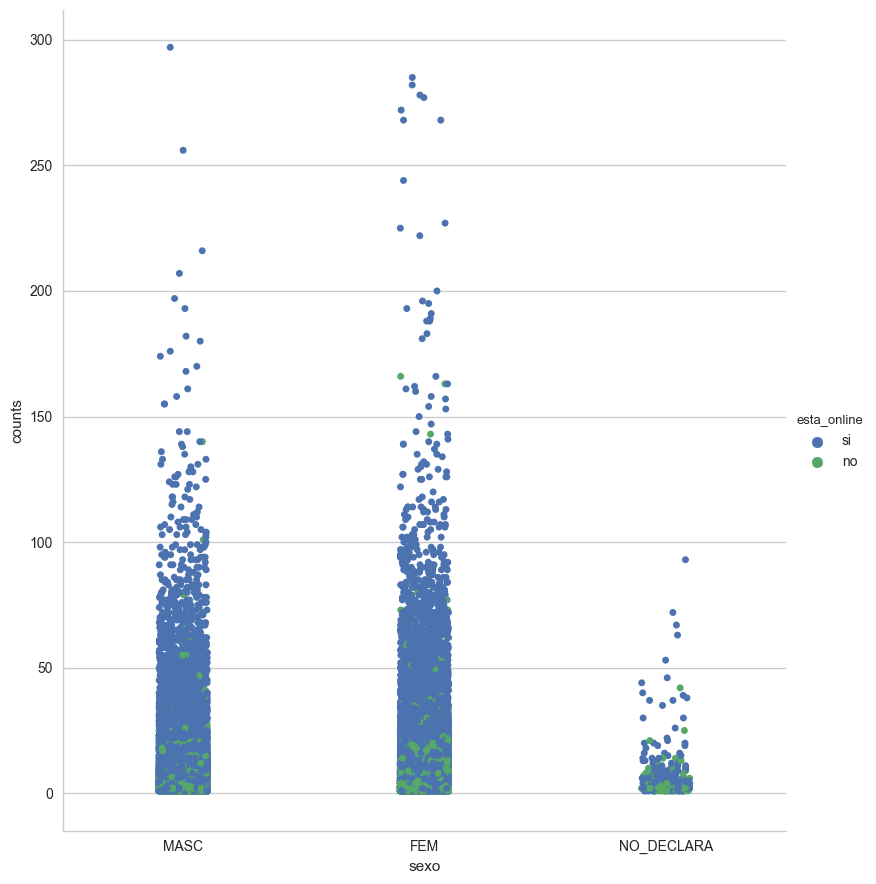

In [32]:
## AGRUPAMOS POR SEXO Y SEGÚN LA RELACIÓN DE SI EL AVISO ESTÁ ONLINE O NO Y COMO ES LA PROPORCIÓN DE VISITAS.
info_postulantes = vistas_avisos_completas.groupby(['idpostulante', 'sexo','esta_online']).size().reset_index(name='counts')
info_postulantes = info_postulantes[info_postulantes['counts'] < 300]
g = sns.factorplot(x="sexo", y="counts", hue="esta_online", data=info_postulantes, kind="strip", jitter=True, size=9, aspect=.9);

## ======================================================================

# 5 - Análisis sobre las postulaciones:

## 5.1 - ¿Qué días de la semana se postula más gente?

La idea es tener ordenada la semana y ver cómo es que hay días más influyentes a la hora de postularse en los anuncios, esto es independiente a las visitas o incluso a los avisos, porque nos da la pauta de que días la gente se termina postulando con mayor frecuencia los diferentes avisos, sería interesante para las empresas el saber que día en la semana es el más propicio para iniciar una búsqueda laboral.

Text(0.5,1,'Postulaciones por dia de la semana')

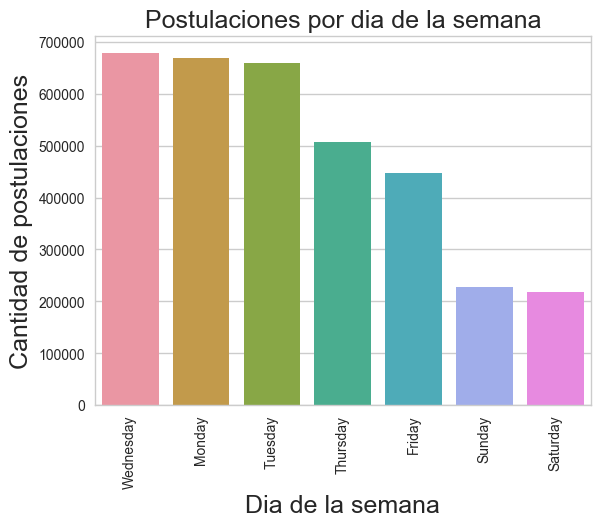

In [33]:
## GRAFICAMOS LOS DÍAS DE LA SEMANA DONDE SE POSTULAN EN LOS AVISOS.
g = sns.countplot(x='dia_semana', data=postulaciones, order=postulaciones['dia_semana'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dia de la semana", fontsize=18)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)
g.set_title("Postulaciones por dia de la semana", fontsize=18)

## 5.2 - ¿Cuales son las areas con mayor cantidad de postulaciones?

Buscamos ver cuales son las areas que mayor interés traen para los usuarios, aunque esto está vinculado directamente a la cantidad de avisos que haya para cada área, pero de todas maneras nos puede ser de utilidad para corroborar cuales son estas áreas y que relación tienen con los avisos y con las visitas realizadas. Como bien podremos ver las areas de Ventas y Administración son las que mayor relevancia tienen y las que más postulaciones reciben, siendo las que predominan en el mercado.


Text(0,0.5,'Area')

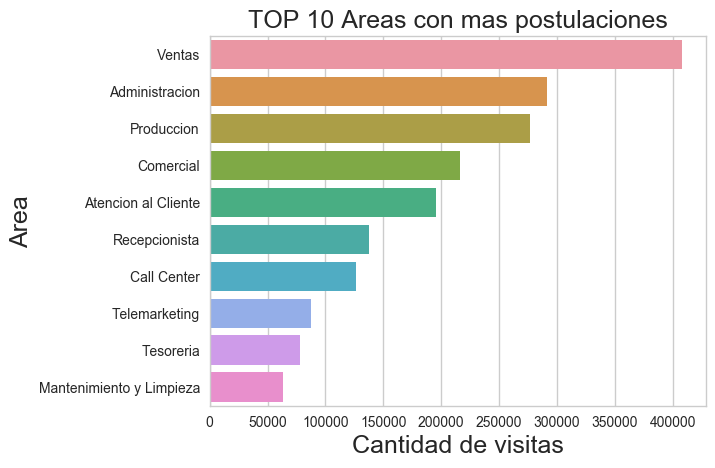

In [34]:
## GRAFICAMOS LAS ÁREAS CON MAYOR RELEVANCIA A LA HORA DE POSTULARSE EN LOS AVISOS.
g = sns.barplot(x= top_postulaciones_area.values, y=top_postulaciones_area.index)
g.set_title("TOP 10 Areas con mas postulaciones", fontsize=18)
g.set_xlabel("Cantidad de visitas", fontsize=18)
g.set_ylabel("Area", fontsize=18)

## 5.3 - ¿Cuales vendrían a ser las ingenierías con mayor cantidad de postulaciones?

Podemos tratar de hacer un paralelismo sobre las áreas en Ingeniería, reduciendo el ámbito de estudio solo a las que se relacionan con ingenieria o ramas afines, esto nos lleva a una conclusión bastante particular y es que la Ingeniería Industrial es la que más relevancia parece tener a la hora de postularse en los avisos.


Text(0,0.5,'Area')

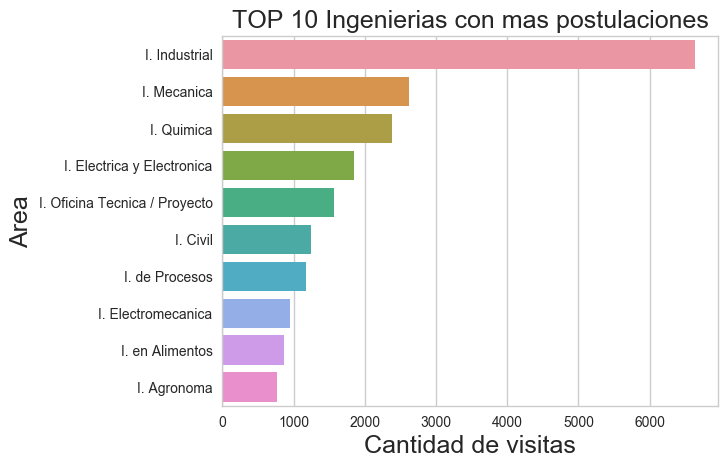

In [35]:
## GRAFICAMOS LAS DIEZ INGENIERÍAS CON MAYOR RELEVANCIA A LA HORA DE POSTULARSE LOS AVISOS.
g = sns.barplot(x=diez_ingenierias.values, y=diez_ingenierias.index)
g.set_title("TOP 10 Ingenierias con mas postulaciones", fontsize=18)
g.set_xlabel("Cantidad de visitas", fontsize=18)
g.set_ylabel("Area", fontsize=18)

## 5.4 - ¿Qué porcentaje de los avisos donde se ha postulado la gente está online?

Lo que nos sirve ver en esta gráfica es ver que porcentaje de los avisos en los que se postula la gente estan online, entendemos que el estado online de un aviso hace referencia a si está activo a la hora en que las personas se han decidido postular.

In [ ]:
## GRAFICAMOS LA PROPORCIÓN ENTRE AVISOS EN LOS QUE SE HA POSTULADO LA GENTE ESTAN ONLINE Y OFFLINE.
postulaciones_online = postulaciones_avisos_completos[postulaciones_avisos_completos['esta_online'] == 'si']
postulaciones_offline = postulaciones_avisos_completos[postulaciones_avisos_completos['esta_online'] != 'si']
sizes = [postulaciones_online.esta_online.count(), postulaciones_offline.esta_online.count()]
nombres = ['Online', 'Offline']
plt.figure(figsize=(8, 6))
plt.title('Distribucion sobre las visitas a los avisos online/offline', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['lightgreen', 'lightblue'], explode=(0.1, 0))
plt.show()

## 5.5 - ¿Cuales son las empresas con mayor cantidad de postulaciones en sus avisos?

Sobre este punto hay que tener en cuenta que esto vinculará las empresas que tengan mayor cantidad de postulaciones pero también se relaciona con aquellas que tienen mayor cantidad de avisos, lo que llevará a tener por lógica una cantidad mayor de postulaciones, por otro lado se trató de unificar algunas empresas que se dividian en zonas pero que en definitiva eran la misma empresa. Se ha decidido tomar las diez primeras como muestra de relevancia.


In [ ]:
## CONTAMOS LAS DIEZ EMPRESAS CON MAYOR CANTIDAD DE POSTULACIONES EN SUS AVISOS.
g = sns.barplot(x=diez_postulaciones_empresas.values, y=diez_postulaciones_empresas.index)
g.set_title("TOP 10 con mas postulaciones a sus avisos", fontsize=15)
g.set_xlabel("Cantidad de visitas", fontsize=12)
g.set_ylabel("Nombre de empresa", fontsize=12)

## 5.6 - ¿Quienes se postulan más a los avisos? ¿Hombres o mujeres?

Buscamos ver que relación hay entre el género a la hora de postularse en los avisos, y ver si estos en definitiva están online u offline, pudiendo así ver cúal es el comportamiento que se va desarrollando entre las personas, habiendo casos donde quizás una persona se postuló en más de 300 avisos en lo que puede parecer una actitud frenética aunque más bien podría parecer ser un bot, son cosas que nos permiten analizar este tipo de situaciones o al menos tener un dejo de duda sobre el mismo, por otro lado como es lógico los valores donde tenemos mayor cantidad son entre 0 a 100.

In [ ]:
## AGRUPAMOS POR SEXO Y SEGÚN LA RELACIÓN DE SI EL AVISO ESTÁ ONLINE O NO Y COMO ES LA PROPORCIÓN DE POSTULACIONES.
postulaciones_avisos_completos = postulaciones_avisos_completos.merge(postulantes_unicos,left_on='idpostulante', right_on='idpostulante',how='left')
info_postulantes = postulaciones_avisos_completos.groupby(['idpostulante', 'sexo','esta_online']).size().reset_index(name='cantidad')
info_postulantes = info_postulantes[info_postulantes['cantidad'] < 750]
g = sns.factorplot(x="sexo", y="cantidad", hue="esta_online", data=info_postulantes, kind="strip", jitter=True, size=10, aspect=.9);

## ======================================================================